In [307]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [308]:
#Reading and viewing the training dataset

df = pd.read_csv(r"C:\Users\USER\Desktop\nkay_ds\bulldozer\Train\Train.csv", low_memory = False, parse_dates= ["saledate"])
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [309]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

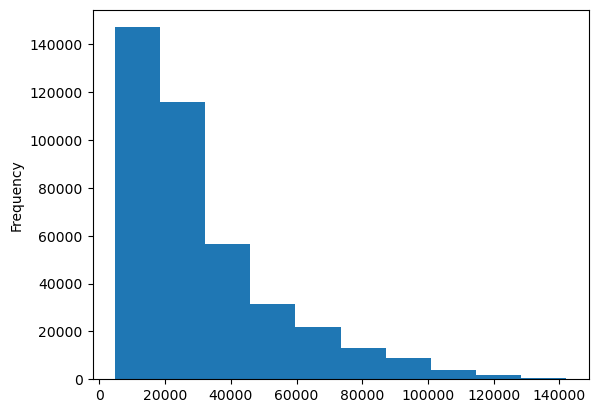

In [311]:
df.SalePrice.plot.hist();

#The higher the prices, the lower the number of cars sold

In [312]:
df.sort_values(by =["saledate"], ascending = True, inplace = True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [313]:
df2 = df.copy()
df2.saledate.head()

205615   1989-01-17
92803    1989-01-31
98346    1989-01-31
169297   1989-01-31
274835   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [314]:
df2["saleyear"] = df2.saledate.dt.year
df2["salemonth"] = df2.saledate.dt.month
df2["saleday"] = df2.saledate.dt.day

In [315]:
df2.saleyear.head()

205615    1989
92803     1989
98346     1989
169297    1989
274835    1989
Name: saleyear, dtype: int64

In [316]:
df2.saleday.head()

205615    17
92803     31
98346     31
169297    31
274835    31
Name: saleday, dtype: int64

In [317]:
df2.salemonth.head()

205615    1
92803     1
98346     1
169297    1
274835    1
Name: salemonth, dtype: int64

In [318]:
#dropping the saledate column
df2.drop("saledate", axis = 1, inplace = True)

In [319]:
df2.state.value_counts()

Florida           63944
Texas             51682
California        29019
Washington        15955
Georgia           14309
Maryland          12965
Mississippi       12961
Ohio              12190
Colorado          11254
Illinois          11209
New Jersey        10882
North Carolina    10404
Tennessee         10027
Alabama            9997
Pennsylvania       9941
South Carolina     9794
Arizona            9173
New York           8604
Connecticut        8128
Minnesota          7734
Missouri           6961
Nevada             6693
Louisiana          6450
Kentucky           5278
Maine              5095
Indiana            4086
Arkansas           3869
New Mexico         3529
Utah               2895
Unspecified        2801
New Hampshire      2724
Wisconsin          2668
Virginia           2288
Idaho              2018
Oregon             1775
Michigan           1763
Wyoming            1662
Montana            1327
Oklahoma           1311
Iowa               1215
West Virginia       746
Nebraska        

In [320]:
#Checking for non numeric data

for label, content in df2.items():
    if pd.api.types.is_string_dtype(content):
        print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [321]:
#converting our column objects from "string" to "category"

for label, content in df2.items():
    if pd.api.types.is_string_dtype(content):
        df2[label] = content.astype("category").cat.as_ordered()
        
df2.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [322]:
df2.state.cat.codes.head()

205615    43
92803      8
98346      8
169297     8
274835     8
dtype: int8

In [323]:
#Dealing with missing data

#showing the percentage of missing data

df2.isnull().sum()/len(df2)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050199
YearMade                    0.000000
MachineHoursCurrentMeter    0.644089
UsageBand                   0.826391
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342016
fiModelSeries               0.858129
fiModelDescriptor           0.820707
ProductSize                 0.525460
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.739829
Enclosure                   0.000810
Forks                       0.521154
Pad_Type                    0.802720
Ride_Control                0.629527
Stick                       0.802720
Transmission                0.543210
Turbocharged                0.802720
B

In [324]:
#Filling missing numeric values in columns

for label, content in df2.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday


In [325]:
#checking for columns with null values
for label, content in df2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [326]:
#filling columns with null values by their median

for label, content in df2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df2[label + "_is_missing"] = pd.isnull(content)
            df2[label] = content.fillna(content.median())

In [327]:
#checking to see the new columns
df2.auctioneerID_is_missing.value_counts()


False    380989
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [328]:
df2.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              331486
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        137191
fiModelSeries                          344217
fiModelDescriptor                      329206
ProductSize                            210775
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           296764
Enclosure                                 325
Forks                             

In [329]:
#filling missing category data with encoded numbers

#check for non-numeric columns

for label, columns in df2.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [330]:
pd.Categorical(df2["state"])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'New York', 'New York', 'New York', 'New York', 'New York']
Length: 401125
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [331]:
pd.Categorical(df2["state"]).codes

array([43,  8,  8, ..., 31, 31, 31], dtype=int8)

In [332]:
pd.Categorical(df2["state"]).categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [333]:
#Filling categorical columns with null values 

for label, content in df2.items():
    if not pd.api.types.is_numeric_dtype(content):
        df2[label + "_is_missing"] = pd.isnull(content)
        df2[label] = pd.Categorical(content).codes+1

In [334]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(2), int16(4), int64(9), int8(40)
memory usage: 72.7 MB


In [335]:
df2.head().T

,205615,92803,98346,169297,274835
SalesID,1646770,1404019,1415646,1596358,1821514
SalePrice,9500,24000,35000,19000,14000
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,True,True,False,False


In [336]:
X = df2.drop("SalePrice", axis =1)
y = df2["SalePrice"]


X_train,X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)


model = RandomForestRegressor(n_jobs = -1, random_state= 7)

In [337]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320900, 100), (320900,), (80225, 100), (80225,))

In [338]:
%%time

model.fit(X_train, y_train)

CPU times: total: 17min 16s
Wall time: 4min 49s


RandomForestRegressor(n_jobs=-1, random_state=7)

In [339]:
model.score(X_test, y_test)

0.9066005893140182

In [340]:
#trying out the sgdregressor to see which model gives a better fit, but first scaling the data
sc = StandardScaler()

X_train2 = sc.fit_transform(X_train)
X_test2 =  sc.transform(X_test)

model_sgd = SGDRegressor(random_state = 7)


model_sgd.fit(X_train2, y_train)

model_sgd.score(X_test2, y_test)

0.4550438407616514

In [341]:
#building a function to evaluate rmsle - root mean square log error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, r2_score

def rmsle (y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [342]:
def show_scores (model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Train MAE": mean_absolute_error(y_train, train_preds),
                "Test MAE": mean_absolute_error(y_test, test_preds),
                "Train RMSLE": rmsle(y_train, train_preds),
                "Test RMSLE": rmsle(y_test, test_preds),
                "Train R2": r2_score(y_train, train_preds),
                "Test R2": r2_score(y_test, test_preds)}
    return scores

In [343]:
#Scoring the RandomForestRegressor model

show_scores(model)

{'Train MAE': 1626.527942380804,
 'Test MAE': 4383.008672982238,
 'Train RMSLE': 0.08605288960998642,
 'Test RMSLE': 0.21279626306517274,
 'Train R2': 0.9869283714082342,
 'Test R2': 0.9066005893140182}

In [344]:
#Scoring the SGD Regressor model

def show_scores2 (model):
    train_preds = model.predict(X_train2)
    test_preds = model.predict(X_test2)
    scores2 = {"Train MAE": mean_absolute_error(y_train, train_preds),
                "Test MAE": mean_absolute_error(y_test, test_preds),
                "Train R2": r2_score(y_train, train_preds),
                "Test R2": r2_score(y_test, test_preds)}
    return scores2

In [345]:
show_scores2(model_sgd)

{'Train MAE': 12159.651165901156,
 'Test MAE': 12207.969671309998,
 'Train R2': 0.4557233108012362,
 'Test R2': 0.4550438407616514}

In [346]:
#Checking the feature importances for the RandomForestModel since it had a better prediction

model.feature_importances_

array([5.17828117e-02, 1.85486294e-02, 3.21871541e-02, 4.91783481e-04,
       5.16134029e-03, 2.62641528e-01, 3.52199432e-03, 1.26423137e-03,
       1.95530399e-02, 7.46933458e-02, 5.25324772e-02, 4.23095984e-03,
       3.87775378e-03, 2.28448378e-01, 3.94015402e-02, 1.02492172e-02,
       1.78511067e-04, 2.11340470e-04, 1.71372304e-03, 9.16889809e-03,
       4.90991950e-04, 4.07649248e-05, 5.70484768e-04, 1.87629932e-04,
       1.26725985e-03, 2.96503517e-05, 4.93183396e-04, 7.42022635e-03,
       4.66218854e-04, 1.90517411e-03, 3.92079873e-03, 3.60622534e-03,
       2.46459518e-03, 9.17467902e-04, 5.35566460e-04, 1.90318267e-03,
       1.07037637e-03, 1.50630221e-02, 7.73887790e-06, 7.36347355e-06,
       1.79452936e-04, 1.13965409e-03, 1.35167797e-03, 8.60990422e-04,
       2.39221518e-04, 5.54328724e-04, 2.17669519e-04, 1.99090284e-03,
       9.36575266e-04, 1.88940361e-04, 2.15839344e-04, 7.66350855e-02,
       1.24265667e-02, 1.08751567e-02, 3.67727525e-04, 5.81273479e-04,
      

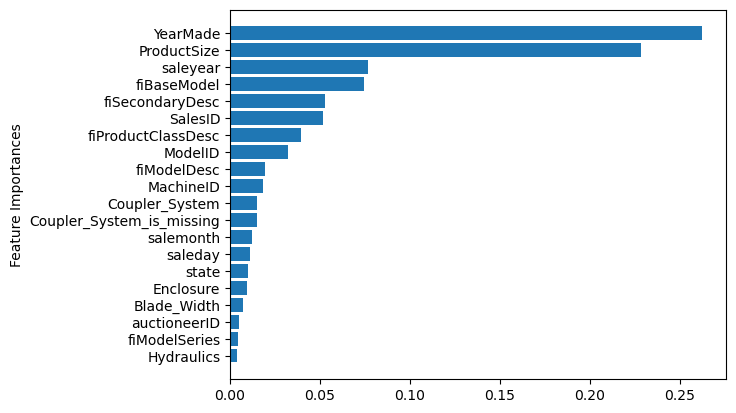

In [347]:
#visualizing the result

def plot_features(columns, importances, n = 20):
    dff = pd.DataFrame({"Features": columns,"Feature_importances": importances})
    dff.sort_values("Feature_importances", ascending = False, inplace=True)
    dff.reset_index(drop = True)

    fig,ax = plt.subplots()
    ax.barh(dff["Features"] [:n], dff["Feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_ylabel("Feature Importances")
    ax.invert_yaxis()


plot_features(X_train.columns, model.feature_importances_)
   

In [ ]:
#The year of manufacturing and product size is seen to have been the features contributing the most